# Task 1
- Single output neuron, standard synapse model, Oja rule, non-stationary input statistics.
    - Change direction of first principal component randomly every certain timesteps.

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import numpy.random as random

In [13]:
N = 10 # number of presynaptic neurons
w0 = random.randn(N)/np.sqrt(N) # weight vector initialisation
e1 = random.randn(N, 1) # first principal component of covariance
e1 = e1 / np.sqrt(e1.T.dot(e1))
e2 = random.randn(N, 1) 
e2 = e2 - (e2.T.dot(e1).item()/e1.T.dot(e1).item())*e1 # second principal component of covariance
e2 = e2 / np.sqrt(e2.T.dot(e2))
T_e = 300 # time interval between changes of direction of e1
a = 1 # magnitude of noise
C = e1.dot(e1.T) + a * np.identity(N) # covariance matrix
mu = np.zeros(N) # mean
tau_w = 50 # time constant for weight updates
T = 800 # total simulation time
dt = 0.01 # time step length
alpha = 1

In [14]:
U = []
W = []
W_norm = []
W1 = []
W2 = []
w = w0

for t in np.arange(0, T, dt):

    if t % T_e == 0:
        e1 = random.randn(N, 1) # first principal component of covariance
        e1 = e1 / np.sqrt(e1.T.dot(e1))
        e2 = random.randn(N, 1) 
        e2 = e2 - (e2.T.dot(e1).item()/e1.T.dot(e1).item())*e1 # second principal component of covariance
        e2 = e2 / np.sqrt(e2.T.dot(e2))
        C = e1.dot(e1.T) + a * np.identity(N)

    u = random.multivariate_normal(mu, C)
    v = u.dot(w)
    w = w + dt * (1/tau_w) * (v*u - alpha*(v**2)*w)
    U.append(u)
    W.append(w)
    W_norm.append(np.sqrt(w.T.dot(w)))
    W1.append(w.dot(e1)/np.sqrt(e1.T.dot(e1)))
    W2.append(w.dot(e2)/np.sqrt(e2.T.dot(e2)))

U = np.array(U)
W = np.array(W)
W_norm = np.array(W_norm)
W1 = np.array(W1)
W1 = W1.squeeze()
W2 = np.array(W2)
W2 = W2.squeeze()

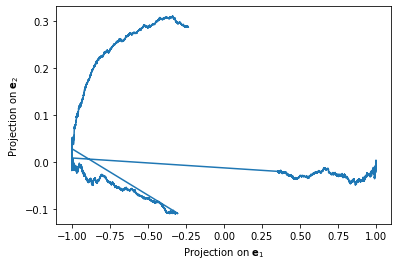

In [15]:
f0 = plt.figure(0)
trace = plt.plot(W1, W2)[0]
plt.xlabel('Projection on $\mathbf{e}_1$')
plt.ylabel('Projection on $\mathbf{e}_2$')
plt.savefig('figures/prep/4.2.pdf')

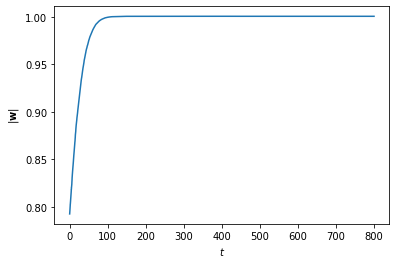

In [16]:
f1 = plt.figure(1)
plt.plot(np.arange(0, T, dt), W_norm)

plt.xlabel('$t$')
plt.ylabel('$|\mathbf{w}|$')
plt.savefig('figures/prep/4.3.pdf')

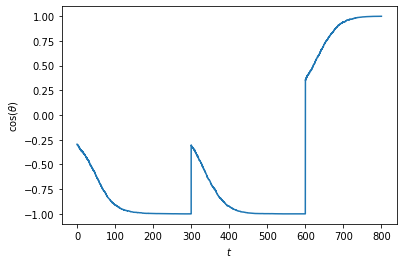

In [17]:
f2 = plt.figure(2)
plt.plot(np.arange(0, T, dt), W1/W_norm)

plt.xlabel('$t$')
plt.ylabel('$\cos(\\theta)$')
plt.savefig('figures/prep/4.1.pdf')